# Importing Libraries

In [67]:
!pip install tweepy

In [1]:
import os 
import tweepy as tw
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline  
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

import re
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Gayathri
[nltk_data]     Bh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Gayathri
[nltk_data]     Bh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Gayathri
[nltk_data]     Bh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Import

In [6]:
data=pd.read_csv('mbti_1dataset.csv')

In [74]:
data.head(10)

,type,posts
0,INFJ,"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ..."
1,ENTP,"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher. Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f..."
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there. And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the las..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358 or 385, though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a hand in every action. Therefore, a...|||I'm not particularly introverted or extraverted, personally. That said, I would say I'm somewhat unphased by either social interactions or being alone. What I'd say I crave more so than anything is...|||Dear Type 9 INFP, Your absolute admiration of me is refreshing. You're a great girlfriend an

In [75]:
data.tail(10)

,type,posts
8665,ENTP,"'This test wasn't even close on my gender, age, or MBTI type.|||Interesting. I checked out the GoTo Quiz. It looks like maybe it takes all the sorting questions from Pottermore? Anyway, with this expanded quiz, I got Ravenclaw at 84% and Slytherin at 73%. I'm...|||A lot of ENTPs test Slytherin. I'm kind of a Slytherclaw. I wanted to be Ravenclaw before I read the Ravenclaw description from Pottermore. After reading that, I was hoping more for Slytherin...|||I probably did a lot of drugs in my youth... but I don't remember. ;) I do know that I don't do drugs now.|||I like dogs and wish them well and never want to see them abused etc. But I LOVE cats. I live with two of them.|||You know you're a thinker when... A good student comes up about 8 points short of an A in the course you teach. You look through the recent work to see if perhaps you were too tough and could...|||My favorite is seeing trees in which children are older than their parents. ;) But to be honest, my own tree is..."
8666,INTJ,"'Highly recommend this to those who wants to try listening to Asian music... Korean rock in particular https://www.youtube.com/watch?v=_1ZUFyS3-e8 Never expected this kind of song coming out...|||1: What's your MBTI Type? INTJ 2: What's your Gender? female 3: Are you the eldest child, middle child, or youngest child? only child 4: How do you learn: Hands-on, seeing, or auditory? seeing 5:...|||https://www.youtube.com/watch?v=wI-XdM7rIo8|||creative INTJs! <3 as for me.. I'm an interior design student and made lots of stuff but for now I'll just share my older works (because my recent project is still on progress!) so here's...|||My closest friend is an ESFP female, and I've known her since I was 3 y.o (I'm 19 this year, and still pretty much suprised at how long this friendship lasts, despite of our differences). We're...|||It's this cute yet weird Japanese short anime, which is also famous as plushies characters! http://www.youtube.com/watch?v=CW7hhMBWyiw lol!|||There are ..."
8667,ENTP,"'I think generally people experience post trauma in a very similar way, which is to seek security and try to rebuild themselves. That being said, I know of a couple who were mega extroverted, friendly...|||Like many other people on this thread, I find it absolutely astonishing that you couldn't find a job with that kind of qualification in a medical field. I would have to agree with @Mzansi that an...|||I think there is an argument that serious trama could cause a personality shift, however I would doubt that it would be a drastic change. For example, When I was a kid, I was incredibly...|||Its incredibly easy to project intelligence to the masses and I think any fool can do it. The main method is to expand your vocabulary and the best way of doing this is to simply read more widely. ...|||I think you need to look at the facts here.. The fact is theres absolutely no evidence that MBTI actually works outside of a clinical laboratory (refer here for...|||Yeah that sounds logical? ..."
8668,INTJ,"'Here's a planned stress relieving activity that will only work once... On the last day you ever see this guy, give him that slap across the on face. Make sure it's a good slap cause you only get to...|||Lately I been struggling with school and found that I am not too happy with my decisions about picking a career path so early in my life. After some thought I figured that I should do something that...|||I find that it help to just disappear without people knowing you did, makes life so much easier and you did have to deal with most unwanted social situations.|||Having a nice dream and never waking up.|||*sad music playing in the background* https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcTrRjhpBOMTy8bgjqXbmKvmizJmSwaBa_UqAqPlG8Y7DalOmiC0kg|||Tell him before he tells you. He'll understand, pissed but understanding. Then sooner or later he'll move pass it and cherish you as a friend and maybe secretly like you for the other thing.|||Afte

In [76]:
data.shape

(8675, 2)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [78]:
data.isnull().sum()

type     0
posts    0
dtype: int64

In [79]:
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,"'Oh! The times I couldn't use a baseball bat...some napalm...or even a small thermonuclear device...But I digress...|||Why must you constantly bang your gums? Are you afraid that if you don't hear the sound of your own voice, you must be dead?|||Oooooh. Somebody's Ovaltine got napalmed this morning.|||Does she have a job? Can she support herself? (And: Are there children involved in this situation?) If so, is it enough for her to make it on her own? If not, can she move in with family? (Do...|||I fantasized about retiring today.|||1. Often first person, sometimes observer. 2. I dream of both people I know/knew. Sometimes a person appears who looks nothing like s/he does in reality, yet I recognize her/him. I rarely dream of...|||My late wife was INTJ and the relationship lasted thirty-five years. Just sayin'...|||Grey .. https://www.youtube.com/watch?v=AxQtmn_f7Og... Life is filled with so many shades of it.|||I have no problems with money--of course, I am much older. It is gen..."
freq,1832,1


# Exploratory Data Analysis

In [80]:
df1=data.copy()

In [81]:
Personality_types = df1['type'].unique()
print(Personality_types)

['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [82]:
count = df1.groupby(['type']).count()
count

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


In [83]:
def plot(data):
    plt.figure(figsize=(20,7))
    plt.xticks(fontsize=24, rotation=0)
    plt.yticks(fontsize=24, rotation=0)
    return sns.countplot(data=df1, x='type')

<AxesSubplot:xlabel='type', ylabel='count'>

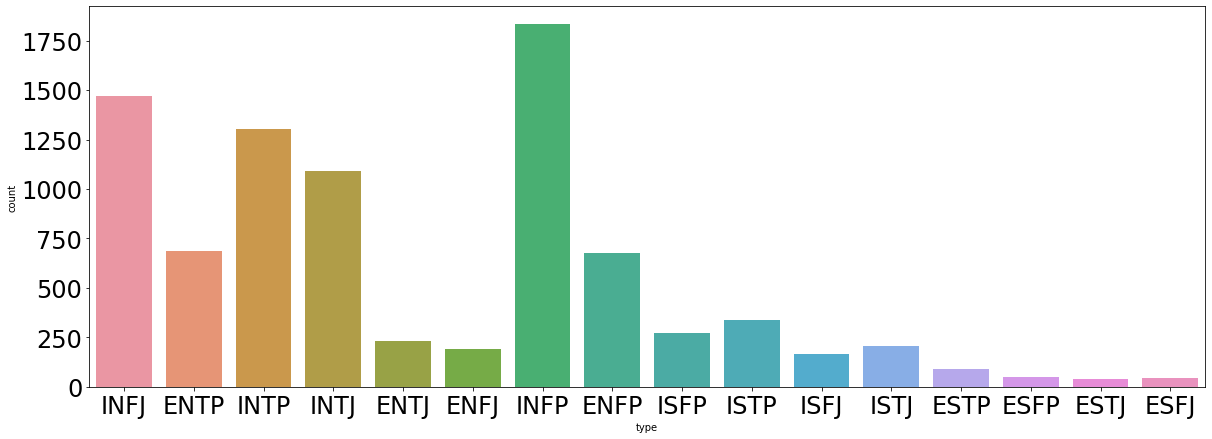

In [84]:
plot(df1)

In [85]:
count = df1.groupby(['type'])['posts'].count()
pie = go.Pie(labels=count.index, values=count.values)
figure = go.Figure(data=[pie])
py.iplot(figure)

In [86]:
df1["NumPosts"] = df1["posts"].apply(lambda x: len(x.split("|||")))

In [87]:
data

,type,posts
0,INFJ,"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ..."
1,ENTP,"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher. Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f..."
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there. And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the las..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358 or 385, though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a hand in every action. Therefore, a...|||I'm not particularly introverted or extraverted, personally. That said, I would say I'm somewhat unphased by either social interactions or being alone. What I'd say I crave more so than anything is...|||Dear Type 9 INFP, Your absolute admiration of me is refreshing. You're a great girlfriend an

In [88]:
df1

,type,posts,NumPosts
0,INFJ,"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...",50
1,ENTP,"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher. Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f...",50
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there. And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the las...",50
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358 or 385, though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a hand in every action. Therefore, a...|||I'm not particularly introverted or extraverted, personally. That said, I would say I'm somewhat unphased by either social interactions or being alone. What I'd say I crave more so than anything is...|||Dear Type 9 INFP, Your absolute admiration of me is refreshing. You're a g

In [89]:
s1=df1["NumPosts"].unique()
s1.sort()
print(s1)

[ 1  2  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 56 57 58 59 60 61 62 63 64 66 67 68 69 70 71 72 73 74 75 77
 78 79 80 83 89]


In [90]:
count=df1.groupby(['NumPosts']).count()
print(count[30:53])

          type  posts
NumPosts             
33          20     20
34          16     16
35          33     33
36          26     26
37          35     35
38          34     34
39          39     39
40          37     37
41          34     34
42          61     61
43          28     28
44          52     52
45          35     35
46          54     54
47          82     82
48          79     79
49          60     60
50        7587   7587
51           2      2
52           5      5
53           4      4
54           2      2
56           6      6


<Figure size 2520x720 with 0 Axes>

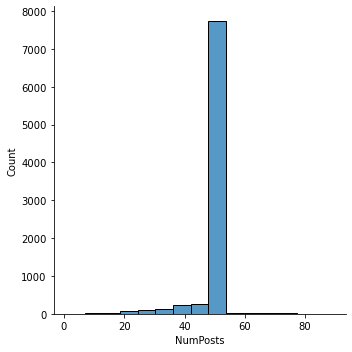

In [91]:
plt.figure(figsize=(35,10))
sns.displot(data=df1, x='NumPosts')

In [92]:
df1[df1["NumPosts"]==4]

,type,posts,NumPosts
3561,ENFP,"I didn't know they practically invented chocolate! That alone should grant them a spot an everyone's list! :)|||Possibly, if we don't collapse from the inside before then. The problem in defense is how far you can go without destroying from within what you are trying to defend from without. - Dwight D....|||When I was a kid..... When I was a kid, I was quiet and shy although fiercely protective of my younger brother. I spent most of my time with my grandparents as my parents were on drugs. My...|||I have a feeling that my list will be a bit different than others, but that always seems to happen. I'm judging my list, not based on influence they held at the time, or military dominance...because...",4
3804,INFP,"'Unfair: The New Science of Criminal Injustice by Adam Benforado|||Happy to have this forum, to discover more about myself and to interact with others. Lots of really cool people here! I've been going through a bit of a rough time lately, but being here makes me...|||582978 Dia de los Muertos collage|||This town seems hardly worth our time, And we'll no longer memorize or rhyme, Too far along in our crime, Stepping over what now towers to the sky, With no connection. - Phantom Limb - The...'",4


In [93]:
def extract_urls(text):
  urls=re.findall(r'(https?:\/\/.*?[\s+])', text)
  return ",".join(urls)

In [94]:
df1['url_links']=df1['posts'].apply(lambda x: extract_urls(x))

In [95]:
df1

,type,posts,NumPosts,url_links
0,INFJ,"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...",50,"http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp ,https://www.youtube.com/watch?v=iz7lE1g4XM4 ,https://www.youtube.com/watch?v=uCdfze1etec ,http://www.youtube.com/watch?v=vXZeYwwRDw8 ,http://www.youtube.com/watch?v=u8ejam5DP3E ,http://vimeo.com/22842206|||Hello ,http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg ,http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ,http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg ,https://www.youtube.com/watch?v=QyPqT8umzmY|||It ,http://www.youtube.com/watch?v=gDhy7rdfm14 ,http://www.youtube.com/watch?v=msqXffgh7b8|||Banned ,http://www.youtube.com/watch?v=Mw7eoU3BMbE|||http://www.youtube.com/watch?v=4V2uYORhQOk|||http://www.youtube.com/watch?v=SlVmgFQQ0TI|||Banned ,http://www.youtube.com/watch?v=IRcrv41hgz4|||1) ,http://www.youtube.com/watch?v=ZRCEq_JFeFM|||http://discovermagazine.com/..."
1,ENTP,"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher. Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f...",50,"http://img188.imageshack.us/img188/6422/6020d1f9da6944a6b71bbe6.jpg|||http://img.adultdvdtalk.com/813a0c6243814cab84c51|||I ,http://i817.photobucket.com/albums/zz96/kamioo/Dirtywinch.png|||Oh, ,http://i817.photobucket.com/albums/zz96/kamioo/Thunderstorm.pnghttp://i817.photobucket.com/albums/zz96/kamioo/Thunderstormbw.png ,http://i817.photobucket.com/albums/zz96/kamioo/Cosmicstorm.png|||No. ,http://www.youtube.com/watch?v=j5W73HaVQBg|||and ,http://i817.photobucket.com/albums/zz96/kamioo/Deathgrip.png ,http://i817.photobucket.com/albums/zz96/kamioo/Deathgripbw.png ,http://i817.photobucket.com/albums/zz96/kamioo/Statickitten.png"
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings

In [97]:
def countyoutubelinks(posts):
    count = 0
    for p in posts:
        if 'youtube' in p:
            count += 1
    return count
        
df1['youtube_links'] = df1['url_links'].apply(lambda x: x.strip().split(",")).apply(countyoutubelinks)

In [98]:
df1

,type,posts,NumPosts,url_links,youtube_links
0,INFJ,"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...",50,"http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp ,https://www.youtube.com/watch?v=iz7lE1g4XM4 ,https://www.youtube.com/watch?v=uCdfze1etec ,http://www.youtube.com/watch?v=vXZeYwwRDw8 ,http://www.youtube.com/watch?v=u8ejam5DP3E ,http://vimeo.com/22842206|||Hello ,http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg ,http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ,http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg ,https://www.youtube.com/watch?v=QyPqT8umzmY|||It ,http://www.youtube.com/watch?v=gDhy7rdfm14 ,http://www.youtube.com/watch?v=msqXffgh7b8|||Banned ,http://www.youtube.com/watch?v=Mw7eoU3BMbE|||http://www.youtube.com/watch?v=4V2uYORhQOk|||http://www.youtube.com/watch?v=SlVmgFQQ0TI|||Banned ,http://www.youtube.com/watch?v=IRcrv41hgz4|||1) ,http://www.youtube.com/watch?v=ZRCEq_JFeFM|||http://discovermagazine.com/...",14
1,ENTP,"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher. Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f...",50,"http://img188.imageshack.us/img188/6422/6020d1f9da6944a6b71bbe6.jpg|||http://img.adultdvdtalk.com/813a0c6243814cab84c51|||I ,http://i817.photobucket.com/albums/zz96/kamioo/Dirtywinch.png|||Oh, ,http://i817.photobucket.com/albums/zz96/kamioo/Thunderstorm.pnghttp://i817.photobucket.com/albums/zz96/kamioo/Thunderstormbw.png ,http://i817.photobucket.com/albums/zz96/kamioo/Cosmicstorm.png|||No. ,http://www.youtube.com/watch?v=j5W73HaVQBg|||and ,http://i817.photobucket.com/albums/zz96/kamioo/Deathgrip.png ,http://i817.photobucket.com/albums/zz96/kamioo/Deathgripbw.png ,http://i817.photobucket.com/albums/zz96/kamioo/Statickitten.png",1
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I rec

In [99]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df1['I-E'] = df1['type'].astype(str).str[0]
df1['I-E'] = df1['I-E'].map(map1)
df1['N-S'] = df1['type'].astype(str).str[1]
df1['N-S'] = df1['N-S'].map(map2)
df1['T-F'] = df1['type'].astype(str).str[2]
df1['T-F'] = df1['T-F'].map(map3)
df1['J-P'] = df1['type'].astype(str).str[3]
df1['J-P'] = df1['J-P'].map(map4)

In [100]:
len(df1[df1['I-E'] == 0])

6676

In [101]:
len(df1[df1['I-E'] == 1])

1999

In [102]:
len(df1[df1['N-S'] == 0])

7478

In [103]:
len(df1[df1['N-S'] == 1])

1197

In [104]:
len(df1[df1['T-F'] == 0])

3981

In [105]:
len(df1[df1['T-F'] == 1])

4694

In [106]:
len(df1[df1['J-P'] == 0])

3434

In [107]:
len(df1[df1['J-P'] == 1])

5241

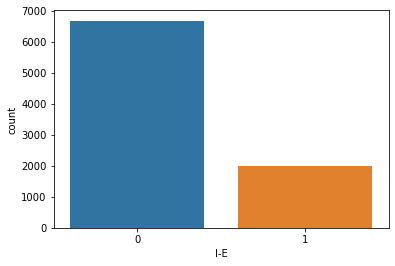

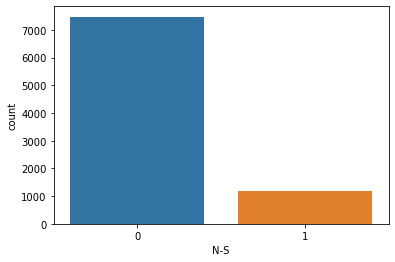

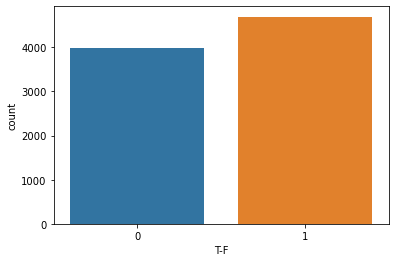

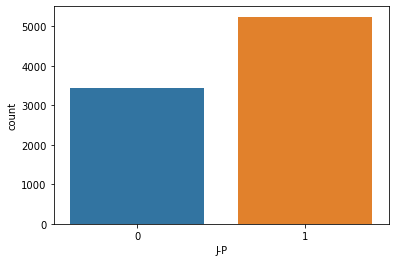

In [108]:
personalities = df1.loc[: , "I-E":"J-P"].columns
for personality in personalities:
    sns.countplot(x=df1[personality],data=df1)
    plt.show()

In [109]:
df_by_personality = df1.groupby("type")['posts'].apply(' '.join).reset_index()
df_by_personality

,type,posts
0,ENFJ,"'https://www.youtube.com/watch?v=PLAaiKvHvZs|||51 :o|||I went through a break up some months ago. We were together for 4 years and I had planned my life around that relationship. I wasn't the one breaking the relationship as you might imagine and all our...|||ENFJ Puns so many puns.|||Well I personally don't go that much for attractiveness in general but I can see you have the will to change that and that's good already. May I ask if you want to be with them in a merely sexual...|||Sorry, not an INFP but I'm really into post-rock so I had to post :< Going to leave this here and sneak out D: https://www.youtube.com/watch?v=usHC-O1BPCM|||Welcome!!!|||wrong thread D:|||That doesn't sound very ENFJ I think x3 I'd never act cold towards a romantic interest. Those just get my warm side I think. When I like someone that way all I want to do is to just straight to them...|||Not really, I'm mostly a guitar player with a bass obsession, I'm the person who ask for the bass to be louder or a..."
1,ENFP,"'He doesn't want to go on the trip without me, so me staying behind wouldn't be an option for him. I think he really does believe that I'm the one being unreasonable. He still continues to say that...|||I'm still completely in AWE and I'm AMAZED that he doesn't think twice about leaving one of them and how that will make them feel. He said he wants to tell them that I'm not willing to work extra for...|||Thanks, everyone. I'm struggling with being selfish and not just going ahead and working to pay for the rest. I don't want my husband to feel unloved or like I don't care about his feelings......but...|||My husband works an extra job each year to pay for a Disney World trip for the two of us, our son together and my two boys ages 12 and 13. He says the vacation is extremely important to him and...|||He said that it's not like he's asking me to do the 90 percent and he is only willing to do 10, but that it's the other way around. He's doing all the sacrificing and once again I'm no..."
2,ENTJ,"'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really his best employee, then that's what may be cooking him. Who wants their most reliable asset gone for that long? ENTJ employer...|||Lol. Its not like our views were unsolicited. What a victim.|||Sometimes I just really like impoverished rap music. https://www.youtube.com/watch?v=Xh0vA6_8mv8|||I probably would have lost it too. His stonewalling was insignificant. He was being an idiot over semantics that didn't have any impact on anything. It's one thing to stone wall on critical shit, but...|||I..."
3,ENTP,"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher. Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.

In [110]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(background_color="white",width = 400 , height = 300).generate(text)
    plt.subplots(1 , 1 , figsize = [20,6])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize = 40)
    plt.show()

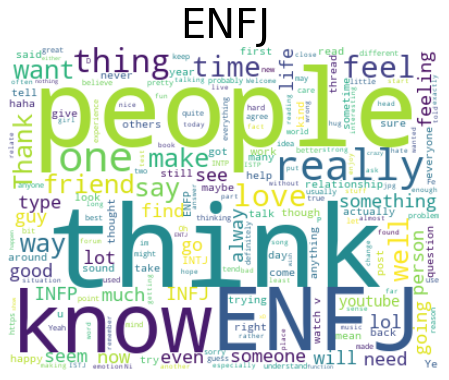

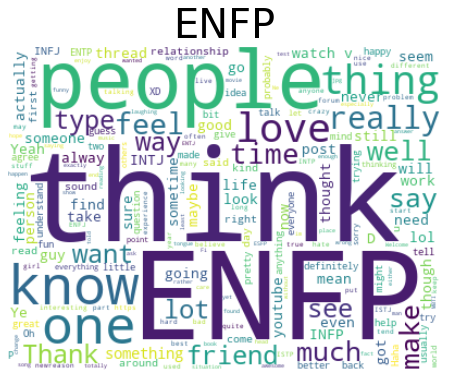

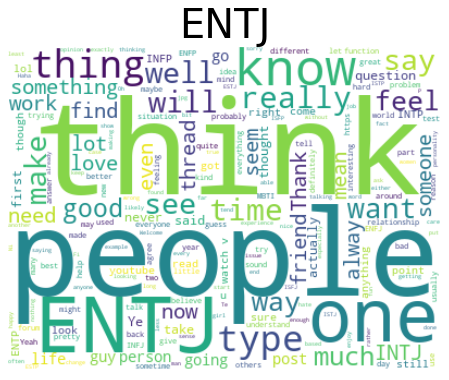

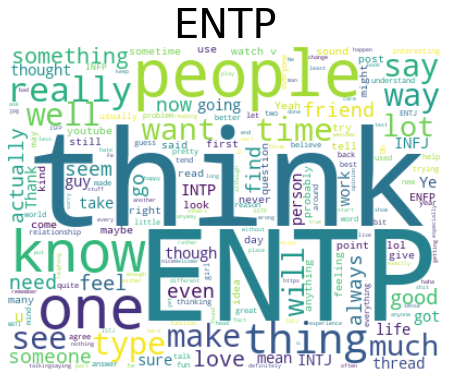

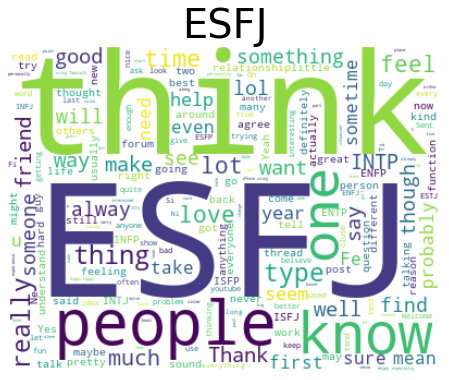

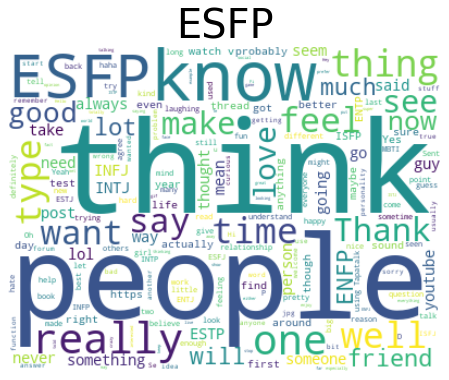

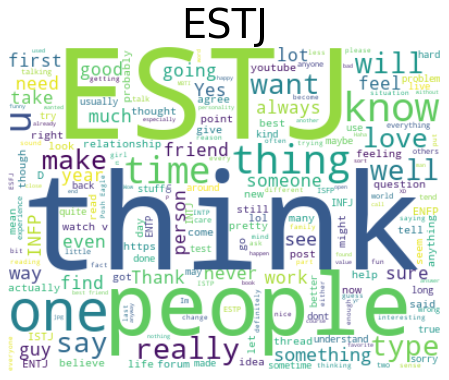

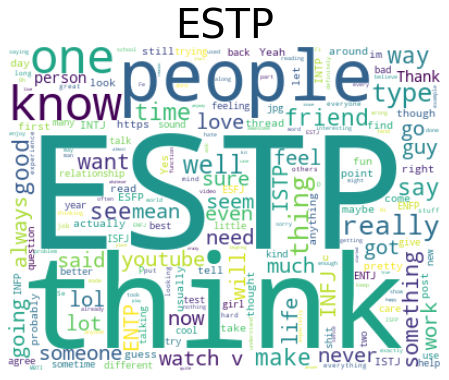

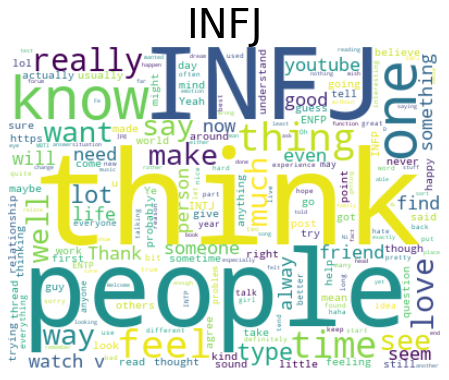

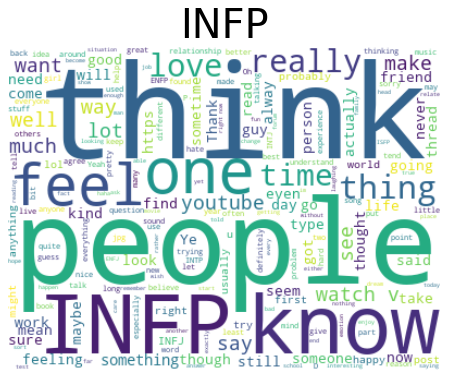

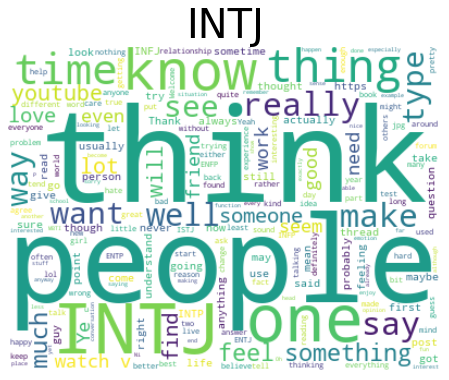

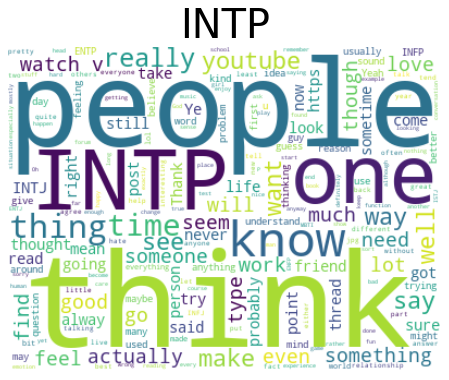

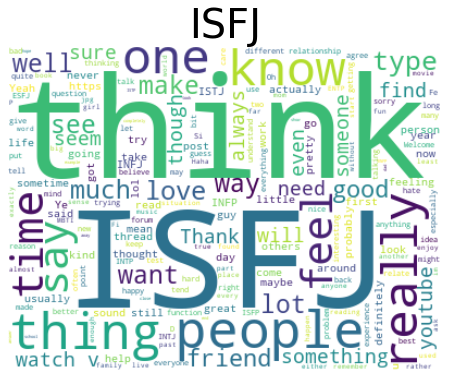

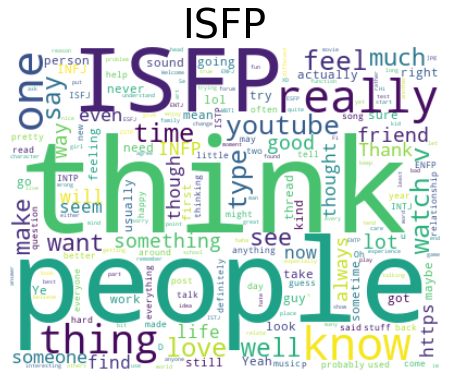

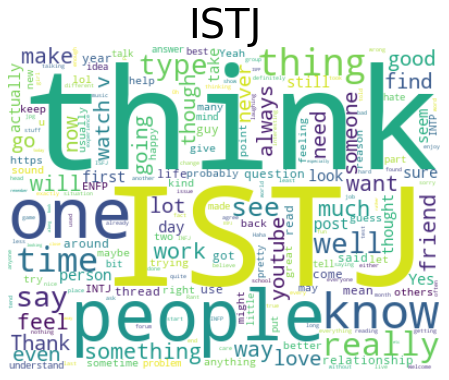

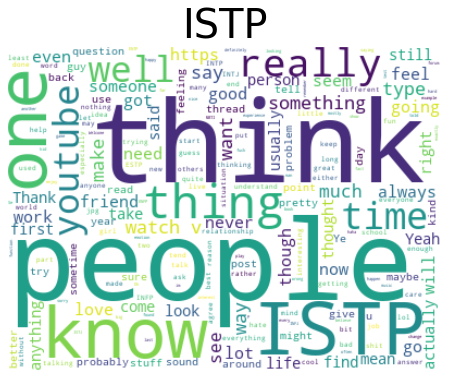

In [111]:
for i, t in enumerate(df_by_personality['type']):
    text = df_by_personality.iloc[i,1]
    generate_wordcloud(text, t)

# Pre Processing

In [112]:
pd.set_option('display.max_colwidth',1000)

In [7]:
def replace_sep(text):
  text = text.replace("|||",' ')
  return text
def remove_url(text):
  text = re.sub(r'https?:\/\/.*?[\s+]', '', text)
  return text
def remove_punct(text):
  text=re.sub(r'[^\w\s]', '', text)
  return text 
def remove_numbers(text):
  text = re.sub(r'[0-9]', '', text)
  return text
def convert_lower(text):
   text = text.lower()
   return text
def extra(text):
  text=text.replace("  ", " ")
  text=re.sub(r'[^a-zA-Z\s]','',text)
  text=text.strip()
  return text

In [8]:
Stopwords = set(stopwords.words("english"))

In [9]:
def stop_words(text):
  tweet_tokens = word_tokenize(text)
  filtered_words = [w for w in tweet_tokens if not w in Stopwords]
  return " ".join(filtered_words)

In [10]:
def lemmantization(text):
  tokenized_text = word_tokenize(text)
  lemmatizer = WordNetLemmatizer()
  text = ' '.join([lemmatizer.lemmatize(a) for a in tokenized_text])
  return text

In [11]:
def pre_process(text):
  text=replace_sep(text)
  text=remove_url(text)
  text=remove_punct(text)
  text=remove_numbers(text)
  text=convert_lower(text)
  text=extra(text)
  text=stop_words(text)
  text=lemmantization(text)
  return text

In [12]:
data['cleaned_posts']= data['posts'].apply(lambda x: pre_process(x))

In [119]:
data.head(5)

,type,posts,cleaned_posts
0,INFJ,"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...",enfp intj moment sportscenter top ten play prank lifechanging experience life repeat today may perc experience immerse last thing infj friend posted facebook committing suicide next day rest peace hello enfj sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg dont mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item youve determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear enfp favorite video game growing current favorite video game cool appears late sad there someone everyone wait thought confidence good thing cherish time solitude bc revel within inner world whereas time id workin enjoy time dont worry people always aro...
1,ENTP,"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher. Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f...",im finding lack post alarming sex boring position often example girlfriend currently environment creatively use cowgirl missionary isnt enough giving new meaning game theory hello entp grin thats take converse flirting acknowledge presence return word smooth wordplay cheeky grin lack balance hand eye coordination real iq test score internet iq test funny score higher like former response thread mention dont believe iq test banish know youre entp vanish site year half return find people still commenting post liking ideasthoughts know youre entp think thing sometimes go old sherlock holmes quote perhaps man special knowledge special power like rather encourages seek complex cheshirewolftumblrcom post really ive never thought ei jp real function judge use use ne ti dominates fe emotion rarely si also use ni due strength know though ingenious saying really want try see happens playing first person shooter back drive around want see look rock paper one best mak

# Training the model

In [13]:
df=data

In [14]:
#Training Data
vector = CountVectorizer(analyzer="word", 
                             max_features=1500, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,  
                             max_df=0.7,
                             min_df=0.1)
X=vector.fit_transform(df.cleaned_posts)
Y=np.array(df.type)

In [15]:
tfidf_transformer = TfidfTransformer()
X_final =tfidf_transformer.fit_transform(X) 


In [123]:
feature_names = list(enumerate(vector.get_feature_names()))
feature_names

[(0, 'ability'),
 (1, 'able'),
 (2, 'absolutely'),
 (3, 'accept'),
 (4, 'accurate'),
 (5, 'across'),
 (6, 'act'),
 (7, 'action'),
 (8, 'actual'),
 (9, 'actually'),
 (10, 'add'),
 (11, 'admit'),
 (12, 'advice'),
 (13, 'afraid'),
 (14, 'age'),
 (15, 'ago'),
 (16, 'agree'),
 (17, 'ah'),
 (18, 'almost'),
 (19, 'alone'),
 (20, 'along'),
 (21, 'already'),
 (22, 'although'),
 (23, 'amazing'),
 (24, 'amount'),
 (25, 'angry'),
 (26, 'animal'),
 (27, 'annoying'),
 (28, 'another'),
 (29, 'answer'),
 (30, 'anxiety'),
 (31, 'anymore'),
 (32, 'anyone'),
 (33, 'anything'),
 (34, 'anyway'),
 (35, 'apparently'),
 (36, 'appreciate'),
 (37, 'approach'),
 (38, 'area'),
 (39, 'arent'),
 (40, 'argument'),
 (41, 'around'),
 (42, 'art'),
 (43, 'ask'),
 (44, 'asked'),
 (45, 'asking'),
 (46, 'aspect'),
 (47, 'assume'),
 (48, 'attention'),
 (49, 'attracted'),
 (50, 'avatar'),
 (51, 'avoid'),
 (52, 'aware'),
 (53, 'away'),
 (54, 'awesome'),
 (55, 'awkward'),
 (56, 'back'),
 (57, 'bad'),
 (58, 'based'),
 (59, 'bas

In [16]:

print(Y.shape)
print(X.shape)
X_train,X_test,Y_train,Y_test=train_test_split(X_final,Y,test_size=0.3,random_state=42)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_predictiontrain = random_forest.predict(X_train)
Y_predictiontest = random_forest.predict(X_test)

print("Train Accuracy:", np.mean(Y_predictiontrain == Y_train))
print("Test Accuracy:", np.mean(Y_predictiontest == Y_test))

accuracy_randomforest = (random_forest.score(X_train, Y_train) * 100)
print((accuracy_randomforest), "%")

(8675,)
(8675, 814)
Train Accuracy: 1.0
Test Accuracy: 0.5912408759124088
100.0 %


In [61]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')  
X_train,X_test,Y_train,Y_test=train_test_split(X_final,Y,test_size=0.3,random_state=42)
svm.fit(X_train,Y_train)

Y_predictiontrain = svm.predict(X_train)
Y_predictiontest = svm.predict(X_test)

print("Train Accuracy:", np.mean(Y_predictiontrain == Y_train))
print("Test Accuracy:", np.mean(Y_predictiontest == Y_test))


svm.score(X_train, Y_train)
acc_svm = round(svm.score(X_train, Y_train) * 100, 2)
print(round(acc_svm,2,), "%")

Train Accuracy: 0.8023715415019763
Test Accuracy: 0.6373415290049942
80.24 %


# Testing

In [17]:
d3=data[8635:8675].copy()

In [18]:
d3.shape

(40, 3)

In [19]:
def identify_personality(test):
  text=tfidf_transformer.transform(vector.transform([test])).toarray()
  all_words = vector.get_feature_names()
  t1 = pd.DataFrame.from_dict({words: text[:, i] for i, words in enumerate(all_words)})
  x = random_forest.predict(t1)
  return x

In [20]:
d3['predicted_personality']= d3['cleaned_posts'].apply(lambda x: identify_personality(x))

In [21]:
d3

,type,posts,cleaned_posts,predicted_personality
8635,INFJ,'Here's a fishing rod instead. If you want to ...,here fishing rod instead want internet search ...,[INFJ]
8636,INFP,'As soon as I replace a slightly newer model o...,soon replace slightly newer model smart phone ...,[INFP]
8637,INTJ,'Screams INFJ for whatever that is worth -- fo...,scream infj whatever worth many reason listed ...,[INTJ]
8638,INFP,'Green Girl Excellent - thank you|||- How t...,green girl excellent thank get intj care peopl...,[INFP]
8639,ENTP,"'Do bare with me. I become bored, quickly and...",bare become bored quickly often ive ignored si...,[ENTP]
8640,INTP,'This is a great thread... I find it interesti...,great thread find interesting different two ty...,[INTP]
8641,INFP,'Sam Cooke A change is gonna come|||I can't st...,sam cooke change gon na come cant stand mainst...,[INFP]
8642,INFJ,'Working out every day @_@ Gotta keep remindin...,working every day got ta keep reminding proper...,[INFJ]
8643,ENTP,'Primeval I know a thing or too about C++ xD||...,primeval know thing c xd garee yeah grew learn...,[ENTP]
8644,INFJ,'I am trying to find ways of putting distance ...,trying find way putting distance u looking lea...,[INFJ]


# Validation

sample-1

In [125]:
data[8670:8671]

,type,posts,cleaned_posts
8670,ISFP,"'https://www.youtube.com/watch?v=t8edHB_h908|||IxFP just because I always think of cats as Fi doms for some reason. https://www.youtube.com/watch?v=ib28iGc9go4|||Especially on websites that have become a haven for neo nazis, such as PerC.|||I'm such a nerd. I've been learning Dutch on Duolingo and I'm having so much fun :)|||Duolingo is the shit! Oh my god I love this XD|||Right wingers do this because they lack political consciousness.|||I doubt it, but if they are real then I hope to hell that they're nothing like the Twilight vampires!|||I would agree that both are likely related to confidence levels. It makes sense to me that someone would be aggressive to overcompensate for a (sometimes perceived) shortcoming.|||Both Nazi Germany and the Soviet Union were extremely nationalist. I can't think of a more nationalist country nowadays than the DPRK. What separates your 'nationalism' from theirs?|||You're not the only one, there are plenty of INFPs who are right wing conservativ...",ixfp always think cat fi doms reason especially website become neo nazi perc im nerd ive learning dutch duolingo im much fun duolingo shit oh god love xd right winger lack political consciousness doubt real hope hell theyre nothing like twilight vampire would agree likely related confidence level make sense someone would aggressive overcompensate sometimes perceived shortcoming nazi germany soviet union extremely nationalist cant think nationalist country nowadays dprk separate nationalism youre one plenty infps right wing conservativesalt reich fascist perc time zone patrick walker voice angel eh cloggies pretty cool people experience feel like going gym morning went anyway one best workout anyway dont feel like exercising anyway youll glad actually thought brand cologne first heard name laughing apparently tempbanned lot people forum theyre pretty dead late color ive come realize need spend time working improving skill learning new thing im usually lazy sitting around watching yo...


In [126]:
q1="ixfp always think cat fi doms reason especially website become neo nazi perc im nerd ive learning dutch duolingo im much fun duolingo shit oh god love xd right winger lack political consciousness doubt real hope hell theyre nothing like twilight vampire would agree likely related confidence level make sense someone would aggressive overcompensate sometimes perceived shortcoming nazi germany soviet union extremely nationalist cant think nationalist country nowadays dprk separate nationalism youre one plenty infps right wing conservativesalt reich fascist perc time zone patrick walker voice angel eh cloggies pretty cool people experience feel like going gym morning went anyway one best workout anyway dont feel like exercising anyway youll glad actually thought brand cologne first heard name laughing apparently tempbanned lot people forum theyre pretty dead late color ive come realize need spend time working improving skill learning new thing im usually lazy sitting around watching youtube playing video game dont felt like good time get fresh new name bit profile makeover george soros gave lot money kid contribute white genocide muslim arab move turn u caliphate im part honestly idea even since shahada gone see youre trying start personality cult replace right poly many tic blood sucking parasite youre welcome asking real question choice fuck either two men must choose one cant neither look exactly feel free use imagination please change name zeta neprok im tired old name thanks dont dissin bob ross eat pineapple pizza would leave embarrassment younger self thats youre smart fuck shahada always nice admit found sort confusing always odds crucial issue obviously shitpost thread stereotype ridiculous granted probably fit lot art skill horrendous always got ta love people use mbti stroke ego rolleyes im going say stupidity think people stupid anything like know many time nuclear war almost happened computer glitch somehow managed get coffee date weekend probably miracle sort im pretty drunk night hasnt even started yet laughing free market isnt free fact extremely coercive authoritarian reason state state institution influenced public sometimes working class people push reform anything feel comfortable around woman around men perc become neo nazi im pretty stupid whats interesting dont talk much lot people dont hear say stupid shit think im smart sucker laughing although disagree said multiculturalism assuming understood meant everything else said right made lot good point dont think he right say thats end goal multiculturalism would agree goal remove white dominance western society let honest thats course allowed sex white people otherwise youre sjw liberal cuck white child contributing white genocide also moderate even mean change depending context political situation time moderate would seen radical extremist people today would"

In [127]:
q2=tfidf_transformer.transform(vector.transform([q1])).toarray()

In [128]:
all_words = vector.get_feature_names()
q3 = pd.DataFrame.from_dict({words: q2[:, i] for i, words in enumerate(all_words)})

In [129]:
x=[]
x=random_forest.predict(q3)
y=x[0]

In [130]:
print(y)

ISFP


sample-2

In [131]:
data[8674:8675]

,type,posts,cleaned_posts
8674,INFP,"'It has been too long since I have been on personalitycafe - although it doesn't seem to have changed one bit - but I must say it is good to be back somewhere like this. Usually I turn to Doctor Who...|||http://www.youtube.com/watch?v=6EEW-9NDM5k|||Overwhelmed by the world around me.|||In one dream I have had I was being chased by a large shadowy creature, with someone else who I felt I had to save above all else. The dream ended after she reached safety, but as for what happened...|||Well now My Avatar is a Doctor Who Clockwork Creature. I always liked this monster because It is just a worker trying to do it's job, kind of :3|||1st - Thanks for your reply, I appreciate all the help I can get. 2nd - I think everyone has the right to their opinion :) (however too many people abuse that right :P )|||Yea, Not Doing the Iron Man Thing xD Thanks for all the advice everyone :)|||Thanks :) I think I needed some humour. I might show them this (maybe). I know they won't do anything hars...",long since personalitycafe although doesnt seem changed one bit must say good back somewhere like usually turn doctor overwhelmed world around one dream chased large shadowy creature someone else felt save else dream ended reached safety happened well avatar doctor clockwork creature always liked monster worker trying job kind st thanks reply appreciate help get nd think everyone right opinion however many people abuse right p yea iron man thing xd thanks advice everyone thanks think needed humour might show maybe know wont anything harsh like throw beat although place go really dont dont really know judge personality type say mum introverted dad extroverted p ok understand want feel liking men thats good problem tell parent want tell really dont know say im contempt always suppose spent afternoon buried book world spending morning animal suppose good mix whats hardest thing im going face life havent got clue current perspective telling parent im gay seems like huge hurdle suspect ...


In [132]:
p1="long since personalitycafe although doesnt seem changed one bit must say good back somewhere like usually turn doctor overwhelmed world around one dream chased large shadowy creature someone else felt save else dream ended reached safety happened well avatar doctor clockwork creature always liked monster worker trying job kind st thanks reply appreciate help get nd think everyone right opinion however many people abuse right p yea iron man thing xd thanks advice everyone thanks think needed humour might show maybe know wont anything harsh like throw beat although place go really dont dont really know judge personality type say mum introverted dad extroverted p ok understand want feel liking men thats good problem tell parent want tell really dont know say im contempt always suppose spent afternoon buried book world spending morning animal suppose good mix whats hardest thing im going face life havent got clue current perspective telling parent im gay seems like huge hurdle suspect seem mi torchwood oh thats fictional oh well still got book two day ago read thought brilliant true family love never wanted deeply understand contempt keeping deeper self different people see look understand knowing important much know also happy let anything get lately feel better either guess wasnt watching comedy central incredible song thanks reply relate part least big deal may made reply pointing well something along line feel although ever entered state mind time need emotion sake sometimes think im young time live life find parent never happy effort give anything say used quite lazy lately tried best everything ask without hassle hey spoiler button still preload image doesnt matter im best driver currently hold restricted licence drive safely dont tell parent speed open road one around dont let someone tell belief wrong think right true people may agree make belief wrong mean midnight blue question many thing feel im contrasting may see dark shade blue fact story behind every line magnificent im fine ad make website know sometimes need reccomendation though make open new window clicked targettop yes want people understand people anyway think doesnt matter could understand many people dont care really fully interested know infjs idea letting people life keeping distance personaly people let world let one wouldnt bothered personally actually sometimes actually think dont realize obvious others might feel dont see good someone wont hang around happens chance wont notice accident good disappearing dont want see library walk somewhere remote alone agree although im black white person outside anyway website need colour bright black doesnt help im defiantly night person doubt enjoy late sleeping half day away say lost balance knew exactly feel say im similar place right lost thing really keep going balance world spinning look good think top navigation barnews would look better darker colour white seems bright would tenth way actually capt jack going say doctor thought second thing seemed appropriate apart tardis would get car drive stopping enjoy thanks solitude right like constructive criticism something work improve guess upset little feel people criticize work something whenever someone tell something done good enough make feel like good enough maybe yes owner lonely heart doctor fan say repeated memory wipe silence eventually fry brain eleventh doctor im remember people currently reading white wolf son good read quite expected picked finish soon next want read wolf gift tonight sit outside window blackness night staring wilderness call space peace beauty could stay till morning light thousand sun stare upon going close facebook month back well wanting able message family ausse school friend found connected website second mar collection seems fitting mood right seen agree actually think first time watched movie beginning got power kinda thought andrew would never work right ok watched underworld awakening must say really good film compared film last month anyway dont think good first would never want turn emotion sometimes hide world still need"

In [133]:
p2=tfidf_transformer.transform(vector.transform([p1])).toarray()

In [134]:
all_words = vector.get_feature_names()
p3 = pd.DataFrame.from_dict({words: p2[:, i] for i, words in enumerate(all_words)})

In [135]:
x=[]
x=random_forest.predict(p3)
y=x[0]

In [136]:
print(y)

INFP


sample-3

In [137]:
data[8673:8674]

,type,posts,cleaned_posts
8673,INFP,"'I am very conflicted right now when it comes to wanting children. I honestly had no maternal instinct whatsoever until recently. Up until now, none of my close friends have had children, and I...|||If I had to guess for my closest friends: 1. ISFJ 2. ESFP 3. ISTJ 4. xNFP 5. ESFJ I don't know if this is correct or not because I don't know if *they* know their types (actually the xNFP...|||What you said in the last paragraph ... as a teacher, this frustrates me too! There's a trend in education to combine classes more and more to contain a variety of types of students (which I won't...|||I can't say that I had much trouble with my community in general. I mean, if I'm talking about my same-age peers, I was never considered popular because I was too into artsy extracurricular...|||I do eat meat, and I do feel guilty about it. I have vaguely considered not eating meat, but I don't think I could actually do it because of my nutritional requirements. I need a high protein diet......",conflicted right come wanting child honestly maternal instinct whatsoever recently none close friend child guess closest friend isfj esfp istj xnfp esfj dont know correct dont know know type actually xnfp said last paragraph teacher frustrates there trend education combine class contain variety type student wont cant say much trouble community general mean im talking sameage peer never considered popular artsy extracurricular eat meat feel guilty vaguely considered eating meat dont think could actually nutritional requirement need high protein diet well boat except teach science theater know people dont think science infp find interesting im good another career exactly god truly created one man one woman technically created woman man product incest per book stayed list going around facebook choice following special order reader bernhard schlink interpreter malady jhumpa amazing list im partially posting im sure find need idea listen list isnt long others im pretty another point inf...


In [138]:
test="conflicted right come wanting child honestly maternal instinct whatsoever recently none close friend child guess closest friend isfj esfp istj xnfp esfj dont know correct dont know know type actually xnfp said last paragraph teacher frustrates there trend education combine class contain variety type student wont cant say much trouble community general mean im talking sameage peer never considered popular artsy extracurricular eat meat feel guilty vaguely considered eating meat dont think could actually nutritional requirement need high protein diet well boat except teach science theater know people dont think science infp find interesting im good another career exactly god truly created one man one woman technically created woman man product incest per book stayed list going around facebook choice following special order reader bernhard schlink interpreter malady jhumpa amazing list im partially posting im sure find need idea listen list isnt long others im pretty another point infp type known idealist heard theory procrastination say come person setting high standard mind ideal perhaps well isnt bit impulse control im feeling calm one else going feel calm cute dont think stereotype think eleanor roosevelt may infp google classified enfp read biography actually seems like introvert forced dont know much subtypes wow definitely teacher first time read thought yeah way reading carefully second time almost perfectly list interest hobby generally like read lot ill tell later though sometimes work get busy also enjoy writing come burst go well cant help heisnt gay thing sorry however commiserate part waiting someone text back feeling like power oh wow totally situation right im treated poorly opposite problem cant seem find courage stand ground dont think cry much mom think im pretty sure think im clinically depressed even though im mean im pretty sure im cry bit lol well feel dumb work see thanks alcohol doesnt actually change base personality easy change mbti wouldnt valid alcohol make say thing would absent site couple month since ive back couple week ago whenever try create thread like right reply thread unable create new also sorry huge long single paragraph reason window wont let create new paragraph attempting fix eggsies thanks reply perspective cheating thing interesting never really thought way especially beginning perhaps make good point infp forum conversation like getting gift agreed lot thing however im terrible gift giver anyone different taste im always good math never enjoyed math fair im slightly f opposed function also say math methodical ok mr enfj conundrum dating enfj since january busy schedule able spend little time love bike use one recreation actual transportation might bike weekend evening errand weather nice except right live steep hill id never make havent clinically diagnosed adhd reading extensively talking mom behavior kid found wanted take psychologist dad yoga clothes tight black capri pink purple tank tear movie sometimes dont generally cry hard exception movie version book read like harry potter believe two hour usually unfortunately kind read lot book fiction im working night circus erin morgenstern almost done dovekeepers alice hoffman also reading im little ambivalent book made movie many favorite book literary enough movie version would atrocious couple agree finish dark could read point without replying may physically alone someone hearing havent posted thread fear may belong curiosity someone desperately wanted meet need didnt know would tell person would even know ask well ive never read book seen looselybased movie see youre saying thought im fully convinced case im greatly appreciate input boxerkitty said enfjs need socialize wide set people time unwind make feel somewhat better one thing would love person choose spend life assuming find someone choose spend life similar point made completely agreed madrabbit exception im pursuing answer never find possibly doesnt exist go cycle get frustrated give decide stop yeah hear know really complicated wish seems way mind one dont entirely know bring without using word marriage dont know sure enfj seems far likely thought id post advice enfjs difficulty relationship something bugging week thought would post people seem get think thing way im seeing original post title anything go totally relate almost posted similar thread able trust relationship day ago desire control others kind freak feel like control feeling situation let explain desire tell someone else others mentioned feel really guilty spend lot money spatype thing feel like could putting somewhere useful especially since dont make ton sad angry pathetic embarrassed love oh definitely definitely stem combination number thing occurred life biggest overall factor form attachment incredibly easy seems im really hoping since referred breakup letter longdistance relationship seriously cant even face person tell feel cant honestly see point saying letter id like change cant imagine anyone said voted intp im closer e ok thing sort issue test took quiz got entertainer one dont think really type reason ill describe two yeah definitely get jealous come romantic relationship honest havent many serious romantic relationship part reason though certainly wait leafstone third volume q book originally split japanese another language spent entire week beach book didnt finish finished since"

In [139]:
text=tfidf_transformer.transform(vector.transform([test])).toarray()

In [140]:
all_words = vector.get_feature_names()
t1 = pd.DataFrame.from_dict({words: text[:, i] for i, words in enumerate(all_words)})

In [141]:
x=[]
x=random_forest.predict(t1)
y=x[0]

In [142]:
print(y)

INFP


# Testing data using Twitter data

In [22]:
import tweepy as tw

In [23]:
consumer_key = 'DadKR3DKcG1PWvyh8igvAIaYN'
consumer_secret = 'KjWoOAwm7uwwT0vTGWcuomuPq9Wglo5pA29kPxhOPvddMmO2Eg'
access_token = '1266720191502680066-YGjG1jvAjIOOsG6NibYCDH7trAznfk'
access_token_secret = '1E8fi5w2hi8eRyvnVvHcJnOU9p66oiJaXe5l1PAIQNYqA'

In [24]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [25]:
handle = '@sundarpichai'

In [147]:
res = api.user_timeline(screen_name=handle,count=50, include_rts=True)
tweets = [tweet.text for tweet in res]

In [148]:
tweets

["Excited to announce the next steps in our partnership with @RelianceJio to accelerate India's digitization, startin… https://t.co/RGwQjj2nHf",
 '#Juneteenth is a time for reflection as we commemorate the end of slavery in the US. Proud to share today’s Doodle… https://t.co/URjREMGsBk',
 "And that's a wrap on day 1! Thanks to everyone who stopped by our new Google Store in NYC. It's a beautiful space a… https://t.co/LqY5YNKcbp",
 'Proud of the work @LorraineTwohill and our marketing teams are doing here https://t.co/PsxesWL6jO',
 'As part of our ongoing racial equity commitments, we’re proud to partner with 10 HBCUs to expand opportunities for… https://t.co/b8JjZFNHND',
 'Our hearts go out to those in India impacted by the ongoing COVID-19 crisis, and we continue to look for ways to he… https://t.co/Xy4RsxH6Ij',
 '@GeoffMartha Thanks Geoff. Inspired by the work the Medtronic team is doing and enjoyed our conversation!',
 'Who will win #EURO2020 ⚽️⚽️',
 'Big congrats to Milo Golding, o

In [26]:
def join(text):
  return "||| ".join(text)
   

In [150]:
t1=join(tweets)

In [151]:
t2=pre_process(t1)

In [152]:
t3=tfidf_transformer.transform(vector.transform([t2])).toarray()
all_words = vector.get_feature_names()
t4 = pd.DataFrame.from_dict({words: t3[:, i] for i, words in enumerate(all_words)})

In [153]:
x=random_forest.predict(t4)

In [154]:
print(x)

['INFP']


In [27]:
def twits(handle):
    res = api.user_timeline(screen_name=handle,count=50, include_rts=True)
    tweets = [tweet.text for tweet in res]
    return tweets

In [28]:
def twit(handle):
    res = api.user_timeline(screen_name=handle,count=50, include_rts=True)
    tweets = [tweet.text for tweet in res]
    t1=join(tweets)
    t2=pre_process(t1)
    t3=tfidf_transformer.transform(vector.transform([t2])).toarray()
    all_words = vector.get_feature_names()
    t4 = pd.DataFrame.from_dict({words: t3[:, i] for i, words in enumerate(all_words)})
    x=[]
    x=random_forest.predict(t4)
    
    y=x[0]
    return y

In [157]:
twit('@finkd')

'INFP'

In [158]:
a=twit('@BillGates')

In [159]:
print(a)

INFP


In [160]:
b=twit('@sundarpichai')

In [161]:
print(b)

INFP


# Recommendations

In [29]:
def split(text):
  return [char for char in text]

In [30]:
List_jobs_I = ['Accounting manager',
               'landscape designer',
               'Behavioral therapist',
               'Graphic designer',
               'IT manager']

List_jobs_E = ['Flight attendant',
               'Event planner',
               'Teacher',
               'criminal investigator',
               'General manager']

List_jobs_S = ['Home health aide',
               'Detective',
               'Actor',
               'Nurse']

List_jobs_N = ['social worker',
               'HR manager',
               'counselor',
               'Therapist']

List_jobs_F = ['Entertainer',
               'Mentor',
               'Advocate',
               'Artist',
               'Defender',
               'Dreamer']

List_jobs_T = ['Video game designer',
               'Graphic designer',
               'Social media manager',
               'Copywriter',
               'Public relations manager',
               'Digital marketers',
               'Lawyer',
               'Research scientist',
               'User experience designer',
               'Software architect']

List_jobs_J = ['Showroom designer',
               'IT administrator',
               'Marketing director',
               'Judge',
               'Coach']

List_jobs_P = ['Museum curator',
               'Copywriter',
               'Public relations specialist',
               'Social worker',
               'Medical researcher',
               'Office Manager']

In [31]:
List_ch_I=['Reflective',
           'Self-aware',
           'Take time making decisions',
           'Feel comfortable being alone',
           'Dont like group works']

List_ch_E=['Enjoy social settings',
           'Do not like or need a lot of alone time',
           'Thrive around people',
           'Outgoing and optimistic',
           'Prefer to talk out problem or questions']

List_ch_N=['Listen to and obey their inner voice',
           'Pay attention to their inner dreams',
           'Typically optimistic souls',
           'Strong sense of purpose',
           'Closely observe their surroundings']

List_ch_S=['Remember events as snapshots of what actually happened',
           'Solve problems by working through facts',
           'Programmatic',
           'Start with facts and then form a big picture',
           'Trust experience first and trust words and symbols less',
           'Sometimes pay so much attention to facts, either present or past, that miss new possibilities']

List_ch_F=['Decides with heart',
           'Dislikes conflict',
           'Passionate',
           'Driven by emotion',
           'Gentle',
           'Easily hurt',
           'Empathetic',
           'Caring of others']

List_ch_T=['Logical',
           'Objective',
           'Decides with head',
           'Wants truth',
           'Rational',
           'Impersonal',
           'Critical',
           'Firm with people']

List_ch_J=['Self-disciplined',
           'Decisive',
           'Structured',
           'Organized',
           'Responsive',
           'Fastidious',
           'Create short and long-term plans',
           'Make a list of things to do',
           'Schedule things in advance',
           'Form and express judgments',
           'Bring closure to an issue so that we can move on']

List_ch_P=['Relaxed',
           'Adaptable',
           'Nonjudgemental',
           'Carefree',
           'Creative',
           'Curious',
           'Postpone decisions to see what other options are available',
           'Act spontaneously',
           'Decide what to do as we do it, rather than forming a plan ahead of time',
           'Do things at the last minute']


In [32]:
def charcter(text):
    o=split(text)
    characteristics=[]
    for i in range(0,4):
        if o[i]=='I':
            characteristics.append('\n'.join(List_ch_I))
        if o[i]=='E':
            characteristics.append('\n'.join(List_ch_E))
        if o[i]=='N':
            characteristics.append('\n'.join(List_ch_N))
        if o[i]=='S':
            characteristics.append('\n'.join(List_ch_S))
        if o[i]=='F':
            characteristics.append('\n'.join(List_ch_F))
        if o[i]=='T':
            characteristics.append('\n'.join(List_ch_F))
        if o[i]=='J':
            characteristics.append('\n'.join(List_ch_J))
        if o[i]=='P':
            characteristics.append('\n'.join(List_ch_P))
    crct='\n'.join(characteristics)
    data = crct.split("\n")
    return data

In [33]:
def recomend(text):
    b=split(text)
    jobs=[]
    for i in range(0,4):
        if b[i]=='I':
            jobs.append('\n'.join(List_jobs_I))
        if b[i]=='E':
            jobs.append('\n'.join(List_jobs_E))
        if b[i]=='N':
            jobs.append('\n'.join(List_jobs_N))
        if b[i]=='S':
            jobs.append('\n'.join(List_jobs_S))
        if b[i]=='F':
            jobs.append('\n'.join(List_jobs_F))
        if b[i]=='T':
            jobs.append('\n'.join(List_jobs_T))
        if b[i]=='J':
            jobs.append('\n'.join(List_jobs_J))
        if b[i]=='P':
            jobs.append('\n'.join(List_jobs_P))
    crct1='\n'.join(jobs)
    data1=crct1.split("\n")
    return (split(data1))

In [34]:
def pp(handle):
    personality=twit(handle)
    return personality,recomend(personality),charcter(personality)

In [168]:
charcter(twit('@finkd'))

['Reflective',
 'Self-aware',
 'Take time making decisions',
 'Feel comfortable being alone',
 'Dont like group works',
 'Listen to and obey their inner voice',
 'Pay attention to their inner dreams',
 'Typically optimistic souls',
 'Strong sense of purpose',
 'Closely observe their surroundings',
 'Decides with heart',
 'Dislikes conflict',
 'Passionate',
 'Driven by emotion',
 'Gentle',
 'Easily hurt',
 'Empathetic',
 'Caring of others',
 'Relaxed',
 'Adaptable',
 'Nonjudgemental',
 'Carefree',
 'Creative',
 'Curious',
 'Postpone decisions to see what other options are available',
 'Act spontaneously',
 'Decide what to do as we do it, rather than forming a plan ahead of time',
 'Do things at the last minute']

In [169]:
recomend(twit('@finkd'))

['Accounting manager',
 'landscape designer',
 'Behavioral therapist',
 'Graphic designer',
 'IT manager',
 'social worker',
 'HR manager',
 'counselor',
 'Therapist',
 'Entertainer',
 'Mentor',
 'Advocate',
 'Artist',
 'Defender',
 'Dreamer',
 'Museum curator',
 'Copywriter',
 'Public relations specialist',
 'Social worker',
 'Medical researcher',
 'Office Manager']

# user_interface

In [6]:
from tkinter import *
from PIL import Image, ImageTk
import tkinter as tk
import os
class MyWindow:
    def __init__(self, win):
        self.bg1= ImageTk.PhotoImage(file="Home.png")
        canvas= Canvas( win,width= 2500, height= 2000)
        canvas.pack(expand=True, fill= BOTH)
        canvas.pack(padx=0,pady=170)
        canvas.create_image(1250,70,image=self.bg1, anchor="ne")
        self.D_lbl0=Label(win, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.btn1 = Button(win, text='MBTI DATA',bg='navy',fg='white',font=30,command=self.mbti)
        self.btn1.place(x=550,y=120)
        self.btn1 = Button(win, text='TWITTER DATA',bg='navy',fg='white',font=30,command=self.posts)
        self.btn1.place(x=750,y=120)
        
    def mbti(self):
        newwin=Toplevel(window)
        newwin.geometry("2600x2000+20+20")
        self.D_lbl0=Label(newwin, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.btn1 = Button(newwin, text='MBTI DATA',bg='green',fg='white',font=30,command=self.mbti)
        self.btn1.place(x=590,y=120)
        self.btn1 = Button(newwin, text='HOME',bg='navy',fg='white',font=30,command=self.home1)
        self.btn1.place(x=490,y=120)
        self.btn1 = Button(newwin, text='MBTI TEST',bg='navy',fg='white',font=30,command=self.mbt)
        self.btn1.place(x=720,y=120)
        self.btn1 = Button(newwin, text='EXPLORATORY DATA',bg='navy',fg='white',font=30,command=self.explore)
        self.btn1.place(x=850,y=120)
        self.D_lbl0=Label(newwin, text='The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides\n everyone into 16 distinct personality types across 4 axis:\n Introversion (I) — Extroversion (E)\nIntuition (N) — Sensing (S)\nThinking (T) — Feeling (F)\nJudging (J) — Perceiving (P)\nThe dataset contains 8675 observations (people), where each observation gives a person’s:\nMyers-Briggs personality type (as a 4-letter code)\nAn excerpt containing the last 50 posts on their PersonalityCafe forum (each entry separated by “|||”)\nFor example, someone who prefers introversion, intuition, thinking and perceiving would be\n labelled an INTP in the MBTI system, and there are lots of personality based components\n that would model or describe this person’s preferences or behaviour based on the label.\n',fg='black', font=("Helvetica", 25))
        self.D_lbl0.place(x=50,y=230)
        
    def mbt(self):
        newwin9=Toplevel(window)
        newwin9.geometry("2600x2000+20+20")
        self.D_lbl0=Label(newwin9, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.btn1 = Button(newwin9, text='MBTI DATA',bg='navy',fg='white',font=30,command=self.mbti)
        self.btn1.place(x=590,y=120)
        self.btn1 = Button(newwin9, text='HOME',bg='navy',fg='white',font=30,command=self.home1)
        self.btn1.place(x=490,y=120)
        self.btn1 = Button(newwin9, text='MBTI TEST',bg='green',fg='white',font=30)
        self.btn1.place(x=720,y=120)
        self.btn1 = Button(newwin9, text='EXPLORATORY DATA',bg='navy',fg='white',font=30,command=self.explore)
        self.btn1.place(x=850,y=120)
        canvas= Canvas( newwin9,width= 2500, height= 2000)
        canvas.pack(expand=True, fill= BOTH)
        canvas.pack(padx=0,pady=170)
        self.bg1= ImageTk.PhotoImage(file="TestResults.png")
        canvas.create_image(1150,70,image=self.bg1, anchor="ne")
        
    def explore(self):
        newwin3=Toplevel(window)
        newwin3.geometry("2600x2000+20+20")
        canvas= Canvas( newwin3,width= 2500, height= 2000)
        canvas.pack(expand=True, fill= BOTH)
        canvas.pack(padx=0,pady=170)
        self.bg1= ImageTk.PhotoImage(file="CountPlot.png")
        canvas.create_image(300,70,image=self.bg1, anchor="nw")
        
        self.D_lbl0=Label(newwin3, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.btn1 = Button(newwin3, text='MBTI DATA',bg='navy',fg='white',font=30,command=self.mbti)
        self.btn1.place(x=590,y=120)
        self.btn1 = Button(newwin3, text='HOME',bg='navy',fg='white',font=30,command=self.home1)
        self.btn1.place(x=490,y=120)
        self.btn1 = Button(newwin3, text='MBTI TEST',bg='navy',fg='white',font=30)
        self.btn1.place(x=720,y=120)
        self.btn1 = Button(newwin3, text='EXPLORATORY DATA',bg='green',fg='white',font=30,command=self.explore)
        self.btn1.place(x=850,y=120)
        self.btn1 = Button(newwin3, text='PIE PLOT',bg='navy',fg='white',font=30,command=self.explore1)
        self.btn1.place(x=150,y=250)
        self.btn1 = Button(newwin3, text='DIS PLOT',bg='navy',fg='white',font=30,command=self.explore2)
        self.btn1.place(x=150,y=320)
        self.btn1 = Button(newwin3, text='I-E PLOT',bg='navy',fg='white',font=30,command=self.explore3)
        self.btn1.place(x=150,y=390)
        self.btn1 = Button(newwin3, text='N-S PLOT',bg='navy',fg='white',font=30,command=self.explore4)
        self.btn1.place(x=150,y=460)
        self.btn1 = Button(newwin3, text='T-F PLOT',bg='navy',fg='white',font=30,command=self.explore5)
        self.btn1.place(x=150,y=530)
        self.btn1 = Button(newwin3, text='P-J PLOT',bg='navy',fg='white',font=30,command=self.explore6)
        self.btn1.place(x=150,y=600)
        
    def explore1(self):
        newwin6=Toplevel(window)
        newwin6.geometry("2600x2000+20+20")
        canvas= Canvas( newwin6,width= 2500, height= 2000)
        canvas.pack(expand=True, fill= BOTH)
        canvas.pack(padx=0,pady=170)
        self.bg1= ImageTk.PhotoImage(file="PiePlot.png")
        canvas.create_image(300,20,image=self.bg1, anchor="nw")
        
        
        self.D_lbl0=Label(newwin6, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.btn1 = Button(newwin6, text='MBTI DATA',bg='navy',fg='white',font=30,command=self.mbti)
        self.btn1.place(x=590,y=120)
        self.btn1 = Button(newwin6, text='HOME',bg='navy',fg='white',font=30,command=self.home1)
        self.btn1.place(x=490,y=120)
        self.btn1 = Button(newwin6, text='MBTI TEST',bg='navy',fg='white',font=30)
        self.btn1.place(x=720,y=120)
        self.btn1 = Button(newwin6, text='EXPLORATORY DATA',bg='green',fg='white',font=30,command=self.explore)
        self.btn1.place(x=850,y=120)
        self.btn1 = Button(newwin6, text='PIE PLOT',bg='green',fg='white',font=30,command=self.explore1)
        self.btn1.place(x=150,y=250)
        self.btn1 = Button(newwin6, text='DIS PLOT',bg='navy',fg='white',font=30,command=self.explore2)
        self.btn1.place(x=150,y=320)
        self.btn1 = Button(newwin6, text='I-E PLOT',bg='navy',fg='white',font=30,command=self.explore3)
        self.btn1.place(x=150,y=390)
        self.btn1 = Button(newwin6, text='N-S PLOT',bg='navy',fg='white',font=30,command=self.explore4)
        self.btn1.place(x=150,y=460)
        self.btn1 = Button(newwin6, text='T-F PLOT',bg='navy',fg='white',font=30,command=self.explore5)
        self.btn1.place(x=150,y=530)
        self.btn1 = Button(newwin6, text='P-J PLOT',bg='navy',fg='white',font=30,command=self.explore6)
        self.btn1.place(x=150,y=600)
        
    def explore2(self):
        newwin7=Toplevel(window)
        newwin7.geometry("2600x2000+20+20")
        canvas= Canvas( newwin7,width= 2500, height= 2000)
        canvas.pack(expand=True, fill= BOTH)
        canvas.pack(padx=0,pady=170)
        self.bg1= ImageTk.PhotoImage(file="Displot.png")
        canvas.create_image(300,20,image=self.bg1, anchor="nw")
        
        self.D_lbl0=Label(newwin7, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.btn1 = Button(newwin7, text='MBTI DATA',bg='navy',fg='white',font=30,command=self.mbti)
        self.btn1.place(x=590,y=120)
        self.btn1 = Button(newwin7, text='HOME',bg='navy',fg='white',font=30,command=self.home1)
        self.btn1.place(x=490,y=120)
        self.btn1 = Button(newwin7, text='MBTI TEST',bg='navy',fg='white',font=30)
        self.btn1.place(x=720,y=120)
        self.btn1 = Button(newwin7, text='EXPLORATORY DATA',bg='green',fg='white',font=30,command=self.explore)
        self.btn1.place(x=850,y=120)
        self.btn1 = Button(newwin7, text='PIE PLOT',bg='navy',fg='white',font=30,command=self.explore1)
        self.btn1.place(x=150,y=250)
        self.btn1 = Button(newwin7, text='DIS PLOT',bg='green',fg='white',font=30,command=self.explore2)
        self.btn1.place(x=150,y=320)
        self.btn1 = Button(newwin7, text='I-E PLOT',bg='navy',fg='white',font=30,command=self.explore3)
        self.btn1.place(x=150,y=390)
        self.btn1 = Button(newwin7, text='N-S PLOT',bg='navy',fg='white',font=30,command=self.explore4)
        self.btn1.place(x=150,y=460)
        self.btn1 = Button(newwin7, text='T-F PLOT',bg='navy',fg='white',font=30,command=self.explore5)
        self.btn1.place(x=150,y=530)
        self.btn1 = Button(newwin7, text='P-J PLOT',bg='navy',fg='white',font=30,command=self.explore6)
        self.btn1.place(x=150,y=600)
        
    def explore3(self):
        newwin8=Toplevel(window)
        newwin8.geometry("2600x2000+20+20")
        canvas= Canvas( newwin8,width= 2500, height= 2000)
        canvas.pack(expand=True, fill= BOTH)
        canvas.pack(padx=0,pady=170)
        self.bg1= ImageTk.PhotoImage(file="I_E.png")
        canvas.create_image(500,100,image=self.bg1, anchor="nw")
        
        self.D_lbl0=Label(newwin8, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.btn1 = Button(newwin8, text='MBTI DATA',bg='navy',fg='white',font=30,command=self.mbti)
        self.btn1.place(x=590,y=120)
        self.btn1 = Button(newwin8, text='HOME',bg='navy',fg='white',font=30,command=self.home1)
        self.btn1.place(x=490,y=120)
        self.btn1 = Button(newwin8, text='MBTI TEST',bg='navy',fg='white',font=30)
        self.btn1.place(x=720,y=120)
        self.btn1 = Button(newwin8, text='EXPLORATORY DATA',bg='green',fg='white',font=30,command=self.explore)
        self.btn1.place(x=850,y=120)
        self.btn1 = Button(newwin8, text='PIE PLOT',bg='navy',fg='white',font=30,command=self.explore1)
        self.btn1.place(x=150,y=250)
        self.btn1 = Button(newwin8, text='DIS PLOT',bg='navy',fg='white',font=30,command=self.explore2)
        self.btn1.place(x=150,y=320)
        self.btn1 = Button(newwin8, text='I-E PLOT',bg='green',fg='white',font=30,command=self.explore3)
        self.btn1.place(x=150,y=390)
        self.btn1 = Button(newwin8, text='N-S PLOT',bg='navy',fg='white',font=30,command=self.explore4)
        self.btn1.place(x=150,y=460)
        self.btn1 = Button(newwin8, text='T-F PLOT',bg='navy',fg='white',font=30,command=self.explore5)
        self.btn1.place(x=150,y=530)
        self.btn1 = Button(newwin8, text='P-J PLOT',bg='navy',fg='white',font=30,command=self.explore6)
        self.btn1.place(x=150,y=600)
        
    def explore4(self):
        newwin8=Toplevel(window)
        newwin8.geometry("2600x2000+20+20")
        canvas= Canvas( newwin8,width= 2500, height= 2000)
        canvas.pack(expand=True, fill= BOTH)
        canvas.pack(padx=0,pady=170)
        self.bg1= ImageTk.PhotoImage(file="N_S.png")
        canvas.create_image(500,100,image=self.bg1, anchor="nw")
        
        self.D_lbl0=Label(newwin8, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.btn1 = Button(newwin8, text='MBTI DATA',bg='navy',fg='white',font=30,command=self.mbti)
        self.btn1.place(x=590,y=120)
        self.btn1 = Button(newwin8, text='HOME',bg='navy',fg='white',font=30,command=self.home1)
        self.btn1.place(x=490,y=120)
        self.btn1 = Button(newwin8, text='MBTI TEST',bg='navy',fg='white',font=30)
        self.btn1.place(x=720,y=120)
        self.btn1 = Button(newwin8, text='EXPLORATORY DATA',bg='green',fg='white',font=30,command=self.explore)
        self.btn1.place(x=850,y=120)
        self.btn1 = Button(newwin8, text='PIE PLOT',bg='navy',fg='white',font=30,command=self.explore1)
        self.btn1.place(x=150,y=250)
        self.btn1 = Button(newwin8, text='DIS PLOT',bg='navy',fg='white',font=30,command=self.explore2)
        self.btn1.place(x=150,y=320)
        self.btn1 = Button(newwin8, text='I-E PLOT',bg='navy',fg='white',font=30,command=self.explore3)
        self.btn1.place(x=150,y=390)
        self.btn1 = Button(newwin8, text='N-S PLOT',bg='green',fg='white',font=30,command=self.explore4)
        self.btn1.place(x=150,y=460)
        self.btn1 = Button(newwin8, text='T-F PLOT',bg='navy',fg='white',font=30,command=self.explore5)
        self.btn1.place(x=150,y=530)
        self.btn1 = Button(newwin8, text='P-J PLOT',bg='navy',fg='white',font=30,command=self.explore6)
        self.btn1.place(x=150,y=600)  
        
    def explore5(self):
        newwin8=Toplevel(window)
        newwin8.geometry("2600x2000+20+20")
        canvas= Canvas( newwin8,width= 2500, height= 2000)
        canvas.pack(expand=True, fill= BOTH)
        canvas.pack(padx=0,pady=170)
        self.bg1= ImageTk.PhotoImage(file="T_F.png")
        canvas.create_image(500,100,image=self.bg1, anchor="nw")
        
        self.D_lbl0=Label(newwin8, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.btn1 = Button(newwin8, text='MBTI DATA',bg='navy',fg='white',font=30,command=self.mbti)
        self.btn1.place(x=590,y=120)
        self.btn1 = Button(newwin8, text='HOME',bg='navy',fg='white',font=30,command=self.home1)
        self.btn1.place(x=490,y=120)
        self.btn1 = Button(newwin8, text='MBTI TEST',bg='navy',fg='white',font=30)
        self.btn1.place(x=720,y=120)
        self.btn1 = Button(newwin8, text='EXPLORATORY DATA',bg='green',fg='white',font=30,command=self.explore)
        self.btn1.place(x=850,y=120)
        self.btn1 = Button(newwin8, text='PIE PLOT',bg='navy',fg='white',font=30,command=self.explore1)
        self.btn1.place(x=150,y=250)
        self.btn1 = Button(newwin8, text='DIS PLOT',bg='navy',fg='white',font=30,command=self.explore2)
        self.btn1.place(x=150,y=320)
        self.btn1 = Button(newwin8, text='I-E PLOT',bg='navy',fg='white',font=30,command=self.explore3)
        self.btn1.place(x=150,y=390)
        self.btn1 = Button(newwin8, text='N-S PLOT',bg='navy',fg='white',font=30,command=self.explore4)
        self.btn1.place(x=150,y=460)
        self.btn1 = Button(newwin8, text='T-F PLOT',bg='green',fg='white',font=30,command=self.explore5)
        self.btn1.place(x=150,y=530)
        self.btn1 = Button(newwin8, text='P-J PLOT',bg='navy',fg='white',font=30,command=self.explore6)
        self.btn1.place(x=150,y=600)
    def explore6(self):
        newwin8=Toplevel(window)
        newwin8.geometry("2600x2000+20+20")
        canvas= Canvas( newwin8,width= 2500, height= 2000)
        canvas.pack(expand=True, fill= BOTH)
        canvas.pack(padx=0,pady=170)
        self.bg1= ImageTk.PhotoImage(file="J_P.png")
        canvas.create_image(500,100,image=self.bg1, anchor="nw")
        
        self.D_lbl0=Label(newwin8, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.btn1 = Button(newwin8, text='MBTI DATA',bg='navy',fg='white',font=30,command=self.mbti)
        self.btn1.place(x=590,y=120)
        self.btn1 = Button(newwin8, text='HOME',bg='navy',fg='white',font=30,command=self.home1)
        self.btn1.place(x=490,y=120)
        self.btn1 = Button(newwin8, text='MBTI TEST',bg='navy',fg='white',font=30)
        self.btn1.place(x=720,y=120)
        self.btn1 = Button(newwin8, text='EXPLORATORY DATA',bg='green',fg='white',font=30,command=self.explore)
        self.btn1.place(x=850,y=120)
        self.btn1 = Button(newwin8, text='PIE PLOT',bg='navy',fg='white',font=30,command=self.explore1)
        self.btn1.place(x=150,y=250)
        self.btn1 = Button(newwin8, text='DIS PLOT',bg='navy',fg='white',font=30,command=self.explore2)
        self.btn1.place(x=150,y=320)
        self.btn1 = Button(newwin8, text='I-E PLOT',bg='navy',fg='white',font=30,command=self.explore3)
        self.btn1.place(x=150,y=390)
        self.btn1 = Button(newwin8, text='N-S PLOT',bg='navy',fg='white',font=30,command=self.explore4)
        self.btn1.place(x=150,y=460)
        self.btn1 = Button(newwin8, text='T-F PLOT',bg='navy',fg='white',font=30,command=self.explore5)
        self.btn1.place(x=150,y=530)
        self.btn1 = Button(newwin8, text='P-J PLOT',bg='green',fg='white',font=30,command=self.explore6)
        self.btn1.place(x=150,y=600)
    
    def twitter(self):
        newwin4=Toplevel(window)
        newwin4.geometry("2600x2000+20+20")
        self.D_lbl0=Label(newwin4, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.btn1 = Button(newwin4, text='HOME',bg='navy',fg='white',font=30,command=self.home1)
        self.btn1.place(x=350,y=120)
       # self.btn1 = Button(newwin4, text='TWITTER DATA',bg='navy',fg='white',font=30,command=self.twitter)
        #self.btn1.place(x=750,y=120)
        self.btn1 = Button(newwin4, text='TWITTER POSTS',bg='navy',fg='white',font=30,command=self.posts)
        self.btn1.place(x=480,y=120)
        self.btn1 = Button(newwin4, text='PREDICTED PERSONALITY',bg='navy',fg='white',font=30,command=self.home)
        self.btn1.place(x=640,y=120)
        self.btn1 = Button(newwin4, text='RECOMENDATIONS',bg='navy',fg='white',font=30,command=self.recomends)
        self.btn1.place(x=870,y=120)
        
    def posts(self):
        newwin2=Toplevel(window)
        newwin2.geometry("2600x2000+20+20")
        self.D_btn1 = Button(newwin2, text='TWITTER POSTS',bg='green',fg='white',font=30,command=self.posts)
        self.D_btn1.place(x=480,y=120)
        self.D_b1=Button(newwin2, text='PREDICT PERSONALITY',bg='navy',fg='white',font=30,command=self.home)
        self.D_b1.place(x=670,y=120)
        self.D_btn1 = Button(newwin2, text='RECOMENDATIONS',bg='navy',fg='white',font=30,command=self.recomends)
        self.D_btn1.place(x=930,y=120)
        self.btn1 = Button(newwin2, text='HOME',bg='navy',fg='white',font=30,command=self.home1)
        self.btn1.place(x=350,y=120)
        #self.btn1 = Button(newwin2, text='TWITTER DATA',bg='navy',fg='white',font=30,command=self.twitter)
        #self.btn1.place(x=750,y=120)
        self.D_lbl0=Label(newwin2, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.t1=Text(newwin2)
        self.t3=Text(newwin2)
        self.t2=Entry(newwin2,font=150,width=30)
        self.lbl1=Label(newwin2, text='Enter Twitter ID: ',bg='navy',fg='white', font=("Helvetica", 30))
        self.lbl1.place(x=60,y=230)
        self.lbl4=Label(newwin2,text='Tweets data of user:',bg='navy',fg='white',font=("Helvetica",15))
        self.lbl4.place(x=150,y=350)
        self.lbl4=Label(newwin2,text='Cleaned data:',bg='navy',fg='white',font=("Helvetica",15))
        self.lbl4.place(x=850,y=350)
        self.t1.place(x=150,y=380)
        self.t3.place(x=850,y=380)
        self.t2.place(x=600,y=230,height=45)
        self.b1=Button(newwin2, text='Get_Tweets',bg='green',fg='white',font=70,command=self.twt)
        self.b1.place(x=400, y=290,width=130,height=50) 
        self.b1=Button(newwin2, text='PreProcess Tweets',bg='green',fg='white',font=70,command=self.twt1)
        self.b1.place(x=800, y=290,width=170,height=50) 
        
    def twt(self):
        handle=self.t2.get()
        res=twits(handle)
        self.t1.insert(END,str(res))
        
    def twt1(self):
        handle=self.t2.get()
        res1=twits(handle)
        tx1=join(res1)
        tx2=pre_process(tx1)
        self.t3.insert(END,str(tx2))
        
    def recomends(self):
        newwin1=Toplevel(window)
        newwin1.geometry("2600x2000+20+20")
        self.D_btn1 = Button(newwin1, text='TWITTER POSTS',bg='navy',fg='white',font=30,command=self.posts)
        self.D_btn1.place(x=480,y=120)
        self.D_b1=Button(newwin1, text='PREDICT PERSONALITY',bg='navy',fg='white',font=30,command=self.home)
        self.D_b1.place(x=670,y=120)
        self.D_btn1 = Button(newwin1, text='RECOMENDATIONS',bg='green',fg='white',font=30,command=self.recomends)
        self.D_btn1.place(x=930,y=120)
        self.btn1 = Button(newwin1, text='HOME',fg='white',bg='navy',font=30,command=self.home1)
        self.btn1.place(x=350,y=120)
       # self.btn1 = Button(newwin1, text='TWITTER DATA',bg='navy',fg='white',font=30,command=self.twitter)
        #self.btn1.place(x=750,y=120)
        self.D_lbl0=Label(newwin1, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.lbl1=Label(newwin1, text='Enter handle name: ',bg='navy',fg='white',font=("Helvetica",25))
        self.lbl2=Label(newwin1, text='Job_Recommendations:',bg='navy',fg='white',font=("Helvetica",15))
        #self.lbl4=Label(text='Charecterstics of a person:',bg='navy',fg='white',font=("Helvetica",15))
        self.lbl5=Label(newwin1,text='Personality Type:',bg='navy',fg='white',font=("Helvetica",15))
        self.b1=Button(newwin1, text='Recomendations',bg='green',fg='white',font=40, command=self.recmd)
        self.b1.place(x=700, y=290)
        self.t0=Entry(newwin1,font=100)
        self.t2=Text(newwin1,height=15,width=85)
        self.t1=Entry(newwin1,font=100)
        self.t0.place(x=700,y=220,height=40)
        self.lbl2.place(x=400,y=410)
        self.lbl1.place(x=400,y=220)
        self.lbl5.place(x=500,y=330)
        self.t1.place(x=680,y=330)
        self.t2.place(x=400,y=460) 
        
    def recmd(self):
        handle=self.t0.get()
        res=twit(handle)
        self.t1.insert(END,str(res))
        r=self.t1.get()
        result=recomend(res)
        for i in range(len(result)):
            self.t2.insert(END, str(result[i]))
            self.t2.insert(END, str('\n'))   
     
    def home(self):
        newwin5=Toplevel(window)
        newwin5.geometry("2600x2000+20+20")
        self.D_btn1 = Button(newwin5, text='TWITTER POSTS',bg='navy',fg='white',font=30,command=self.posts)
        self.D_btn1.place(x=480,y=120)
        self.D_b1=Button(newwin5, text='PREDICT PERSONALITY',bg='green',fg='white',font=30,command=self.home)
        self.D_b1.place(x=670,y=120)
        self.D_btn1 = Button(newwin5, text='RECOMENDATIONS',bg='navy',fg='white',font=30,command=self.recomends)
        self.D_btn1.place(x=930,y=120)
        self.btn1 = Button(newwin5, text='HOME',bg='navy',fg='white',font=30,command=self.home1)
        self.btn1.place(x=350,y=120)
        #self.btn1 = Button(newwin5, text='TWITTER DATA',bg='navy',fg='white',font=30,command=self.twitter)
        #self.btn1.place(x=750,y=120)
        self.D_lbl0=Label(newwin5, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.lbl2=Label(newwin5, text='Characteristics of Personalities:',bg='navy',fg='white' ,font=("Helvetica", 25))
        self.lbl2.place(x=830,y=250)
        self.t=Text(newwin5,height=15,width=85)
        self.t.place(x=830,y=310)
        self.lbl2=Label(newwin5, text='Predicted Personality Type ',bg='navy',fg='white' ,font=("Helvetica", 25))
        self.lbl2.place(x=30,y=430)
        self.lbl1=Label( newwin5,text='Enter handle name of twitter: ',bg='navy',fg='white', font=("Helvetica", 25))
        self.lbl1.place(x=30,y=300)
        self.t1=Entry(newwin5,bd=3,font=100)
        self.t1.place(x=480,y=300,height=40)
        self.t2=Entry(newwin5,bd=3,font=100)
        self.t2.place(x=480,y=430,height=40)
        self.b1=Button(newwin5, text='Predict_personality',bg='green',fg='white',font=70, command=self.predict)
        self.b1.place(x=400, y=380)  
        
    def predict(self):
        handle=self.t1.get()
        res=twit(handle)
        self.t2.insert(END,str(res))
        r=self.t2.get()
        result=charcter(res)
        for i in range(len(result)):
            self.t.insert(END, str(result[i]))
            self.t.insert(END, str('\n'))  
    def home1(self):
        newwin15=Toplevel(window)
        newwin15.geometry("2600x2000+20+20")
        self.bg1= ImageTk.PhotoImage(file="Home.png")
        canvas= Canvas( newwin15,width= 2500, height= 2000)
        canvas.pack(expand=True, fill= BOTH)
        canvas.pack(padx=0,pady=170)
        canvas.create_image(1250,70,image=self.bg1, anchor="ne")
        self.D_lbl0=Label(newwin15, text='Personality Based Job Recommender Using Twitter Data ',fg='navy', font=("Helvetica", 40))
        self.D_lbl0.place(x=110,y=30)
        self.btn1 = Button(newwin15, text='MBTI DATA',bg='navy',fg='white',font=30,command=self.mbti)
        self.btn1.place(x=550,y=120)
        self.btn1 = Button(newwin15, text='TWITTER DATA',bg='navy',fg='white',font=30,command=self.posts)
        self.btn1.place(x=750,y=120)
window=tk.Tk()
mywin=MyWindow(window)
window.geometry("2600x2000+20+20")
window.mainloop()